## Description:

This project aims to use deep learning methodology for cardiac detection.
Cardiac detection is a medical method used to indicate size and position of the heart in the chest area.
This allows professional to detect early diseases such as Cardiomyopathy, Pneumothorax and Atelectasis.
The early detection reduces the risk of severe courses and long term consequences for patients.

# DATA:

The data we are going to are the RSNA Pneaumonia Detection dataset used in the kaggle challenge.
The data includes 496 chest XRAY images.

https://www.kaggle.com/competitions/rsna-pneumonia-detection-challenge/

In [22]:
import cv2
import pydicom 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from pathlib import Path

In [20]:
data_hd = pd.read_csv("../data/raw/rsna_heart_detection.csv")
data_hd.head(10)

,label,x0,y0,w,h,name,img_shape_x,img_shape_y
0,heart,91,71,77,102,ca112a3c-b701-48b8-a94f-725ea65416a7,224,224
1,heart,70,64,89,67,e5f292ae-f1e5-497c-b0a0-68f1aa2196b2,224,224
2,heart,82,55,81,76,67af68f7-7ba0-49a0-a373-3a8801eb0faa,224,224
3,heart,93,74,78,89,814289a3-9ce8-4cba-842f-45d6a36f540d,224,224
4,heart,85,61,85,93,e508969f-c931-462b-aa90-ccde34a4d9e5,224,224
5,heart,63,60,100,85,f1e96436-85c2-4179-b7e9-3f3091e29d76,224,224
6,heart,102,87,60,61,a20a3112-7585-430c-b648-8d81d301acbf,224,224
7,heart,85,71,77,77,eb31f994-518b-4e9d-9a52-ccbf541cfa9f,224,224
8,heart,89,65,71,85,4cf82164-6678-4864-bbc4-5a93419424f7,224,224
9,heart,84,65,76,72,e20af8e8-56f2-486f-962e-7706d77dc5f5,224,224


In [24]:
ROOT_PATH = Path("../data/raw/stage_2_train_images/") # to import raw xray images
SAVE_PATH = Path("../data/processed/Processed_heart_detection/") # to save processed images

# Data visualization

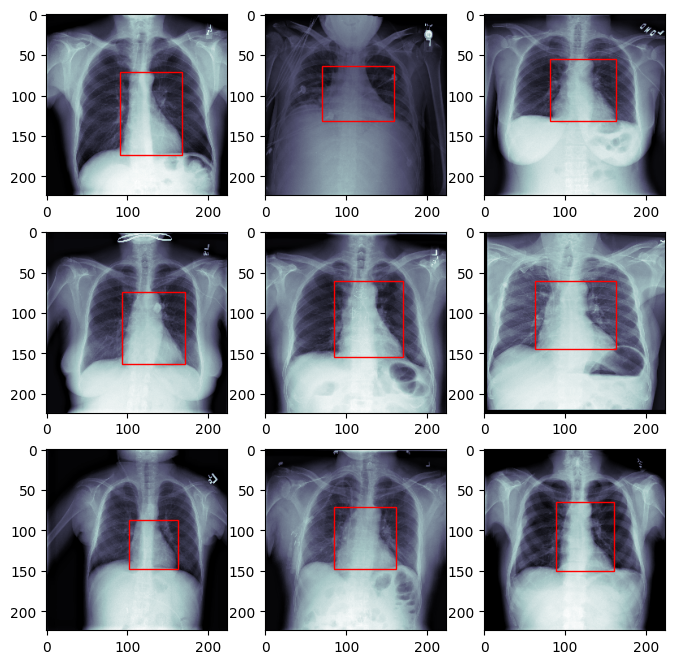

In [ ]:
c = 0
fig, axis = plt.subplots(3,3,figsize = (8,8))

for i in range(3):
    for j in range(3):
        data = data_hd.iloc[c]
        patient_id = data["name"]
        dcm_path = (ROOT_PATH/str(patient_id)).with_suffix(".dcm") #add extension to make it readable by pydicom

        dcm_file = pydicom.read_file(dcm_path)
        dcm_array = cv2.resize(dcm_file.pixel_array,(224,224))

        # box around the heart in the chest xray image
        x = data["x0"]
        y = data["y0"]
        w = data["w"]
        h = data["h"]

        #
        axis[i][j].imshow(dcm_array,cmap='bone')
        rect = patches.Rectangle((x,y), w, h, linewidth = 1, edgecolor="r", facecolor="none")
        axis[i][j].add_patch(rect)

        c+=1